<a href="https://colab.research.google.com/github/JesserEdua/Data/blob/main/CasoPracticoFinal_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DE LIBRERÍAS

In [ ]:
import pandas as pd
import numpy as np

### 1. Cargar los datos y realizar un análisis exploratorio y una evaluación de la calidad de los datos necesarios para el resto del caso. Específicamente, evaluar la integridad, validez y actualidad de los datos y proponer estrategias de mitigación de los posibles problemas encontrados.

In [ ]:
#Revision del archivo compas-score
with open('compas-scores.csv', encoding = 'utf8') as f:
    for _ in range(5) : print(f.readline())

id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score,score_text,screening_date

1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,,1,F,Aggravated Assault w/Firearm,0,,,O,,,,,,0,,,,,,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14

2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,0,5,0,0,0,,,,,,,,O,,-1,

In [ ]:
# Se crea el dataframe
reincidencias = pd.read_csv('compas-scores.csv', encoding = 'utf8', sep = ',', parse_dates = ['compas_screening_date',
                                                                                              'dob',
                                                                                              'c_jail_in',
                                                                                              'c_jail_out',
                                                                                              'c_offense_date',
                                                                                              'c_arrest_date',
                                                                                              'r_offense_date',
                                                                                              'r_jail_in',
                                                                                              'r_jail_out',
                                                                                              'vr_offense_date',
                                                                                              'v_screening_date',
                                                                                              'screening_date'
                                                                                             ])
reincidencias.head(5)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaT,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,O,NaN,NaT,NaN,NaT,NaT,0,NaN,NaN,NaN,NaT,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
1,2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,0,5,0,0,0,NaN,NaT,NaT,NaN,NaT,NaT,NaN,O,NaN,-1,NaN,NaN,O,NaN,NaT,NaN,NaT,NaT,0,NaN,NaN,NaN,NaT,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaT,1.0,F,Felony Battery w/Prior Convict,1,NaN,13009779CF10A,F,NaN,2013-07-05,Felony Battery (Dom Strang),NaT,NaT,1,NaN,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
3,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaT,1.0,F,Possession of Cocaine,1,NaN,13011511MM10A,M,0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,0,NaN,NaN,NaN,NaT,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
4,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaT,NaT,13000570CF10A,2013-01-12,NaT,1.0,F,Possession of Cannabis,0,NaN,NaN,O,NaN,NaT,NaN,NaT,NaT,0,NaN,NaN,NaN,NaT,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13


In [ ]:
reincidencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11757 entries, 0 to 11756
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       11757 non-null  int64         
 1   name                     11757 non-null  object        
 2   first                    11757 non-null  object        
 3   last                     11757 non-null  object        
 4   compas_screening_date    11757 non-null  datetime64[ns]
 5   sex                      11757 non-null  object        
 6   dob                      11757 non-null  datetime64[ns]
 7   age                      11757 non-null  int64         
 8   age_cat                  11757 non-null  object        
 9   race                     11757 non-null  object        
 10  juv_fel_count            11757 non-null  int64         
 11  decile_score             11757 non-null  int64         
 12  juv_misd_count           11757 n

In [ ]:
# Se crea un nuevo dataframe y se seleccionan los atributos para desarrollar el caso.
# Se seleccionan los 7 atributos indicados por el caso: compas_screening_date, decile_score, v_decile_score, is_recid, r_offense_date, is_violent_recid, vr_offense_date
# Se seleccionan 8 atributos adicionales que se consideran importantes para el analisis y que contibuyen a una mejor identificación
# id : Identificador único del registro.
# sex: Distinguir si es hombre o mujer en la evualuación de riesgo. 
# age: 
# age_cat:
# race: Distinguir si el tipo de raza en el tipo de reincidencia.
# priors_count:
# v_score_text:
# score_text:

reincidencias2 = reincidencias[['id', 'sex','compas_screening_date','age', 'age_cat', 'race', 'decile_score', 'priors_count','is_recid', 'r_offense_date','is_violent_recid', 'vr_offense_date','v_decile_score',  
'v_score_text', 'score_text']].copy()
reincidencias2

,id,sex,compas_screening_date,age,age_cat,race,decile_score,priors_count,is_recid,r_offense_date,is_violent_recid,vr_offense_date,v_decile_score,v_score_text,score_text
0,1,Male,2013-08-14,69,Greater than 45,Other,1,0,0,NaT,0,NaT,1,Low,Low
1,2,Male,2014-12-31,31,25 - 45,Caucasian,5,0,-1,NaT,0,NaT,2,Low,Medium
2,3,Male,2013-01-27,34,25 - 45,African-American,3,0,1,2013-07-05,1,2013-07-05,1,Low,Low
3,4,Male,2013-04-14,24,Less than 25,African-American,4,4,1,2013-06-16,0,NaT,3,Low,Low
4,5,Male,2013-01-13,23,Less than 25,African-American,8,1,0,NaT,0,NaT,6,Medium,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11752,11753,Male,2013-09-22,47,Greater than 45,Other,3,1,0,NaT,0,NaT,1,Low,Low
11753,11754,Male,2013-05-17,22,Less than 25,Caucasian,7,3,1,2014-10-11,0,NaT,5,Medium,Medium
11754,11755,Male,2014-10-08,35,25 - 45,Other,4,0,0,NaT,0,NaT,3,Low,Low
11755,11756,Male,2013-12-03,29,25 - 45,Caucasian,3,2,0,NaT,0,NaT,2,Low,Low


In [ ]:
# Se crea una función para realizar un analisis exploratorio (integridad, validez y actualidad).

def revisa_columna(df,col):
    print(f'Columna: \033[1m {col} \033[0m')
    print(f' \033[1m Informacion: \033[0m \n{df[col].describe()} ')
    print('*'*25)
    print(f' \033[1m NULOS: \033[0m {df[col].isnull().sum()} ')
    print('*'*25)
    if df[col].nunique() < 50 :
        print(f' \033[1m VALORES UNICOS: \033[0m \n{df[col].unique()}')
    else :
        print(f' \033[1m DATOS COLUMNA: \033[0m \n{df[col].head()}')
    print('-'*25)

In [ ]:
reincidencias2.columns

Index(['id', 'sex', 'compas_screening_date', 'age', 'age_cat', 'race',
       'decile_score', 'priors_count', 'is_recid', 'r_offense_date',
       'is_violent_recid', 'vr_offense_date', 'v_decile_score', 'v_score_text',
       'score_text'],
      dtype='object')

In [ ]:
# Se aplica la función a cada una de las columnas del dataframe
for ncolum in reincidencias2.columns :
    revisa_columna(reincidencias2,ncolum)

# Comentarios relevantes:
# Sex: El 79 % de los casos corresponden a hombres, y es necesario transformar a tipo de dato categorico.
# compas_screening_date: Es necesario transformar a tipo fecha.
# age: Es necesario transformar a tipo int.
# age_cat : Es necesario transformar a tipo de dato categorico y verificar la validez del dato.
# race: Es necesario transformar a tipo de dato categorico.
# decile_score: Es necesario analizar la existencia de valores negativos.
# prior_count: 
# ***is_recid : REVISAR VALORES NEGATIVOS !!! Se identifican a valores negativos y luego decidir la transformación a tipo categorico.
# r_offense_date : Es necesario transformar a tipo date.
# is_violent_recid: Es necesario transformar a tipo de dato categorico.
# vr_offense_date: Es necesario transformar a tipo date.
# v_decile_score: REVISAR VALORES NEGATIVOS !!! Se identifican a valores negativos y luego decidir la transformación a tipo categorico.
# v_score_text: REVISAR VALORES NAN, y transformar a categorico.
# score_text: REVISAR VALORES NAN, y transformar a categorico.


Columna:  id 
  Informacion:  
count    11757.000000
mean      5879.000000
std       3394.097892
min          1.000000
25%       2940.000000
50%       5879.000000
75%       8818.000000
max      11757.000000
Name: id, dtype: float64 
*************************
  NULOS:  0 
*************************
  DATOS COLUMNA:  
0    1
1    2
2    3
3    4
4    5
Name: id, dtype: int64
-------------------------
Columna:  sex 
  Informacion:  
count     11757
unique        2
top        Male
freq       9336
Name: sex, dtype: object 
*************************
  NULOS:  0 
*************************
  VALORES UNICOS:  
['Male' 'Female']
-------------------------
Columna:  compas_screening_date 
  Informacion:  
count                   11757
unique                    704
top       2013-03-20 00:00:00
freq                       39
first     2013-01-01 00:00:00
last      2014-12-31 00:00:00
Name: compas_screening_date, dtype: object 
*************************
  NULOS:  0 
*************************
  DATOS C

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """


In [ ]:
reincidencias2.columns

Index(['id', 'sex', 'compas_screening_date', 'age', 'age_cat', 'race',
       'decile_score', 'priors_count', 'is_recid', 'r_offense_date',
       'is_violent_recid', 'vr_offense_date', 'v_decile_score', 'v_score_text',
       'score_text'],
      dtype='object')

In [ ]:
reincidencias2[reincidencias2['is_recid']==-1]['id'].count()

719

In [ ]:
reincidencias3 = reincidencias2.drop(reincidencias2[reincidencias2['is_recid']==-1].index)

In [ ]:
reincidencias3.shape

(11038, 15)

In [ ]:
revisa_columna(reincidencias3,'decile_score')

Columna:  decile_score 
  Informacion:  
count    11038.000000
mean         4.406324
std          2.877409
min         -1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         10.000000
Name: decile_score, dtype: float64 
*************************
  NULOS:  0 
*************************
  VALORES UNICOS:  
[ 1  3  4  8  6 10  5  9  2 -1  7]
-------------------------


In [ ]:
# Transformación de tipos de datos en cada atributo

reincidencias3['sex'] = reincidencias3['sex'].astype('category')
reincidencias3['compas_screening_date'] = pd.to_datetime(reincidencias3['compas_screening_date'], format="%Y-%m-%d")
reincidencias3['age'] = reincidencias3['age'].astype('int')
reincidencias3['age_cat'] = reincidencias3['age_cat'].astype('category')
reincidencias3['race'] = reincidencias3['race'].astype('category')
#reincidencias3['is_recid'] = reincidencias3['is_recid'].astype('category')
reincidencias3['r_offense_date'] = pd.to_datetime(reincidencias3['r_offense_date'], format="%Y-%m-%d")
#reincidencias3['is_violent_recid'] = reincidencias3['is_violent_recid'].astype('category')
reincidencias3['vr_offense_date'] = pd.to_datetime(reincidencias3['vr_offense_date'], format="%Y-%m-%d")
reincidencias3['v_decile_score'] = reincidencias3['v_decile_score'].astype('category')
reincidencias3['v_score_text'] = reincidencias3['v_score_text'].astype('category')
reincidencias3['score_text'] = reincidencias3['score_text'].astype('category')

In [ ]:
reincidencias3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11038 entries, 0 to 11756
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     11038 non-null  int64         
 1   sex                    11038 non-null  category      
 2   compas_screening_date  11038 non-null  datetime64[ns]
 3   age                    11038 non-null  int64         
 4   age_cat                11038 non-null  category      
 5   race                   11038 non-null  category      
 6   decile_score           11038 non-null  int64         
 7   priors_count           11038 non-null  int64         
 8   is_recid               11038 non-null  int64         
 9   r_offense_date         3703 non-null   datetime64[ns]
 10  is_violent_recid       11038 non-null  int64         
 11  vr_offense_date        882 non-null    datetime64[ns]
 12  v_decile_score         11038 non-null  category      
 13  v

In [ ]:
print(reincidencias3['compas_screening_date'].describe())
print(reincidencias3['r_offense_date'].describe())
print(reincidencias3['vr_offense_date'].describe())

count                   11038
unique                    704
top       2013-03-20 00:00:00
freq                       36
first     2013-01-01 00:00:00
last      2014-12-31 00:00:00
Name: compas_screening_date, dtype: object
count                    3703
unique                   1090
top       2014-12-08 00:00:00
freq                       12
first     2013-01-03 00:00:00
last      2016-03-29 00:00:00
Name: r_offense_date, dtype: object
count                     882
unique                    599
top       2015-08-15 00:00:00
freq                        6
first     2013-01-28 00:00:00
last      2016-03-13 00:00:00
Name: vr_offense_date, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is sepa

# 2.- ¿Son los campos “is_recid” e “is_violent_recid” en este conjunto de datos adecuados para evaluar la precisión de las estimaciones de riesgo generadas por el sistema COMPAS? Si no es así, definir y calcular una feature que sí lo sea.

In [ ]:
#Distribución de decile score segun puntaje.
puntaje_compass = reincidencias3.groupby('decile_score')['id'].count()
print(puntaje_compass)

decile_score
-1       11
 1     2368
 2     1478
 3     1167
 4     1130
 5      982
 6      941
 7      862
 8      758
 9      761
 10     580
Name: id, dtype: int64


In [ ]:
puntaje_violent = reincidencias3[reincidencias3['is_violent_recid']==1]
puntaje_violent

,id,sex,compas_screening_date,age,age_cat,race,decile_score,priors_count,is_recid,r_offense_date,is_violent_recid,vr_offense_date,v_decile_score,v_score_text,score_text
2,3,Male,2013-01-27,34,25 - 45,African-American,3,0,1,2013-07-05,1,2013-07-05,1,Low,Low
12,13,Male,2013-11-04,21,Less than 25,Caucasian,3,1,1,2015-01-06,1,2015-01-06,5,Medium,Low
22,23,Male,2013-11-17,31,25 - 45,Caucasian,5,6,1,2014-07-16,1,2014-07-16,4,Low,Medium
36,37,Male,2013-05-06,27,25 - 45,African-American,3,8,1,2013-11-06,1,2015-02-23,3,Low,Low
39,40,Male,2014-10-24,33,25 - 45,African-American,10,0,1,2015-08-15,1,2015-08-15,6,Medium,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11678,11679,Male,2014-03-29,26,25 - 45,African-American,3,1,1,2014-12-05,1,2014-12-05,2,Low,Low
11680,11681,Male,2013-04-10,33,25 - 45,African-American,9,7,1,2015-10-22,1,2015-10-22,6,Medium,High
11683,11684,Male,2013-12-10,45,Greater than 45,African-American,9,7,1,2014-07-12,1,2015-12-20,9,High,High
11696,11697,Male,2014-08-21,28,25 - 45,Caucasian,5,4,1,2015-06-24,1,2015-06-24,4,Low,Medium


In [ ]:
puntaje_violent.groupby('decile_score')['id'].count()

decile_score
1      82
2      66
3      70
4      84
5      80
6      86
7     102
8     103
9     107
10    102
Name: id, dtype: int64

In [ ]:
reincidencias3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11038 entries, 0 to 11756
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     11038 non-null  int64         
 1   sex                    11038 non-null  category      
 2   compas_screening_date  11038 non-null  datetime64[ns]
 3   age                    11038 non-null  int64         
 4   age_cat                11038 non-null  category      
 5   race                   11038 non-null  category      
 6   decile_score           11038 non-null  int64         
 7   priors_count           11038 non-null  int64         
 8   is_recid               11038 non-null  int64         
 9   r_offense_date         3703 non-null   datetime64[ns]
 10  is_violent_recid       11038 non-null  int64         
 11  vr_offense_date        882 non-null    datetime64[ns]
 12  v_decile_score         11038 non-null  category      
 13  v

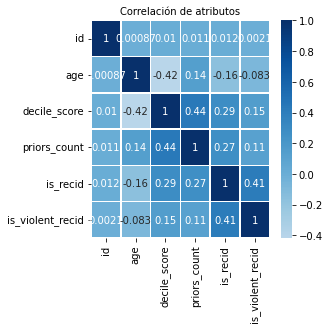

In [ ]:
#Correlacion Pearson entre variables numericas.
import seaborn as sns
import matplotlib.pyplot as plt 

correlacion = reincidencias3.corr(method ='spearman')
f, ax = plt.subplots(figsize=(4,4))
plt.title('Correlación de atributos', size=10)
sns.heatmap(correlacion, cmap="Blues", annot=True , linewidths=.5, center=0)
plt.show()

In [ ]:
correlacion

,id,age,decile_score,priors_count,is_recid,is_violent_recid
id,1.000000,0.000868,0.010017,0.010659,0.012445,0.002063
age,0.000868,1.000000,-0.416816,0.137449,-0.158166,-0.082961
decile_score,0.010017,-0.416816,1.000000,0.439396,0.285313,0.148525
priors_count,0.010659,0.137449,0.439396,1.000000,0.268078,0.110125
is_recid,0.012445,-0.158166,0.285313,0.268078,1.000000,0.414759
is_violent_recid,0.002063,-0.082961,0.148525,0.110125,0.414759,1.000000


In [ ]:
#reincidencias2[reincidencias2['is_recid']==-1 & reincidencias2['r_offense_date'].isnull()]
#reincidencias2[(reincidencias2.isrecid==-1) & (reincidencias2.r_offense_date.isnull())]

# Revisión de casos con categoria is recid -1 y sin fecha de reincidencia. 
reincidencias2[reincidencias2['is_recid']==-1 & pd.isnull(reincidencias2['is_recid'])]

,id,sex,compas_screening_date,age,age_cat,race,decile_score,priors_count,is_recid,r_offense_date,is_violent_recid,vr_offense_date,v_decile_score,v_score_text,score_text
0,1,Male,2013-08-14,69,Greater than 45,Other,1,0,0,NaT,0,NaT,1,Low,Low
4,5,Male,2013-01-13,23,Less than 25,African-American,8,1,0,NaT,0,NaT,6,Medium,High
5,6,Male,2013-03-26,43,25 - 45,Other,1,2,0,NaT,0,NaT,1,Low,Low
6,7,Male,2013-11-30,44,25 - 45,Other,1,0,0,NaT,0,NaT,1,Low,Low
8,9,Male,2013-08-30,43,25 - 45,Other,4,3,0,NaT,0,NaT,3,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11750,11751,Male,2014-03-04,44,25 - 45,Hispanic,1,0,0,NaT,0,NaT,1,Low,Low
11752,11753,Male,2013-09-22,47,Greater than 45,Other,3,1,0,NaT,0,NaT,1,Low,Low
11754,11755,Male,2014-10-08,35,25 - 45,Other,4,0,0,NaT,0,NaT,3,Low,Low
11755,11756,Male,2013-12-03,29,25 - 45,Caucasian,3,2,0,NaT,0,NaT,2,Low,Low


In [ ]:
#Variables categoricas
reincidencias['sex'] = reincidencias['sex'].astype('category')
reincidencias['age_cat'] = reincidencias['age_cat'].astype('category')
reincidencias['race'] = reincidencias['race'].astype('category')


JUV_FEL_COUNT Numero de delitos juveniles

In [ ]:
#la columna decile_score tiene valores -1 
#Tratamiento para revisar esos valores
numv = reincidencias[reincidencias['decile_score']==-1]['id'].count()
totalregistros = reincidencias['id'].count()
print(numv)
print(totalregistros)

porcentaje = (numv * 100 ) / totalregistros
print(porcentaje)



15
11757
0.12758356723653994


In [ ]:
#Se procede a eliminar los datos con valores - 1 ya que corresponden a 0.12% 
#de la data y por lo tanto no afecta al analisis
reincidencias2 = reincidencias[reincidencias['decile_score']!=-1]


In [ ]:
reincidencias2['decile_score'].unique()

array([ 1,  5,  3,  4,  8,  6, 10,  9,  2,  7])

In [ ]:
#se procede a transformar a variable categorica
reincidencias2['decile_score'] = reincidencias2['decile_score'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
reincidencias2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11742 entries, 0 to 11756
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       11742 non-null  int64         
 1   name                     11742 non-null  object        
 2   first                    11742 non-null  object        
 3   last                     11742 non-null  object        
 4   compas_screening_date    11742 non-null  datetime64[ns]
 5   sex                      11742 non-null  category      
 6   dob                      11742 non-null  datetime64[ns]
 7   age                      11742 non-null  int64         
 8   age_cat                  11742 non-null  category      
 9   race                     11742 non-null  category      
 10  juv_fel_count            11742 non-null  int64         
 11  decile_score             11742 non-null  category      
 12  juv_misd_count           11742 n

In [ ]:
#Continuamos con el analisis de la informacion de las columnas
for ncolum in reincidencias2.columns :
    revisa_columna(reincidencias2,ncolum)

Columna:  id 
  Informacion:  
count    11742.000000
mean      5879.149208
std       3393.345429
min          1.000000
25%       2940.250000
50%       5878.500000
75%       8817.750000
max      11757.000000
Name: id, dtype: float64 
*************************
  NULOS:  0 
*************************
  DATOS COLUMNA:  
0    1
1    2
2    3
3    4
4    5
Name: id, dtype: int64
-------------------------
Columna:  name 
  Informacion:  
count          11742
unique         11569
top       john brown
freq               4
Name: name, dtype: object 
*************************
  NULOS:  0 
*************************
  DATOS COLUMNA:  
0    miguel hernandez
1        michael ryan
2         kevon dixon
3            ed philo
4         marcu brown
Name: name, dtype: object
-------------------------
Columna:  first 
  Informacion:  
count       11742
unique       4056
top       michael
freq          263
Name: first, dtype: object 
*************************
  NULOS:  0 
*************************
  DATOS CO

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """


  Informacion:  
count    11742.000000
mean        35.131409
std         12.013833
min         18.000000
25%         25.000000
50%         32.000000
75%         43.000000
max         96.000000
Name: age, dtype: float64 
*************************
  NULOS:  0 
*************************
  DATOS COLUMNA:  
0    69
1    31
2    34
3    24
4    23
Name: age, dtype: int64
-------------------------
Columna:  age_cat 
  Informacion:  
count       11742
unique          3
top       25 - 45
freq         6644
Name: age_cat, dtype: object 
*************************
  NULOS:  0 
*************************
  VALORES UNICOS:  
['Greater than 45', '25 - 45', 'Less than 25']
Categories (3, object): ['Greater than 45', '25 - 45', 'Less than 25']
-------------------------
Columna:  race 
  Informacion:  
count                11742
unique                   6
top       African-American
freq                  5807
Name: race, dtype: object 
*************************
  NULOS:  0 
*************************
  VALO

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_

  Informacion:  
count             11004
unique            11004
top       13012896CF10A
freq                  1
Name: c_case_number, dtype: object 
*************************
  NULOS:  738 
*************************
  DATOS COLUMNA:  
0    13011352CF10A
1              NaN
2    13001275CF10A
3    13005330CF10A
4    13000570CF10A
Name: c_case_number, dtype: object
-------------------------
Columna:  c_offense_date 
  Informacion:  
count                    9147
unique                   1033
top       2013-03-20 00:00:00
freq                       29
first     1987-11-07 00:00:00
last      2014-12-30 00:00:00
Name: c_offense_date, dtype: object 
*************************
  NULOS:  2595 
*************************
  DATOS COLUMNA:  
0   2013-08-13
1          NaT
2   2013-01-26
3   2013-04-13
4   2013-01-12
Name: c_offense_date, dtype: datetime64[ns]
-------------------------
Columna:  c_arrest_date 
  Informacion:  
count                    1857
unique                    801
top       2013-

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """


  VALORES UNICOS:  
['O' 'F' 'M']
-------------------------
Columna:  r_days_from_arrest 
  Informacion:  
count    2459.000000
mean       20.418869
std        74.368824
min        -1.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       993.000000
Name: r_days_from_arrest, dtype: float64 
*************************
  NULOS:  9283 
*************************
  DATOS COLUMNA:  
0    NaN
1    NaN
2    NaN
3    0.0
4    NaN
Name: r_days_from_arrest, dtype: float64
-------------------------
Columna:  r_offense_date 
  Informacion:  
count                    3701
unique                   1090
top       2014-12-08 00:00:00
freq                       12
first     2013-01-03 00:00:00
last      2016-03-29 00:00:00
Name: r_offense_date, dtype: object 
*************************
  NULOS:  8041 
*************************
  DATOS COLUMNA:  
0          NaT
1          NaT
2   2013-07-05
3   2013-06-16
4          NaT
Name: r_offense_date, dtype: datetime64[ns]
------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """


In [ ]:
#DAYS_B_SCREENING_ARREST 
reincidencias2[reincidencias2['days_b_screening_arrest']==-597]


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
6749,6750,corey golden,corey,golden,2014-12-05,Male,1994-02-04,22,Less than 25,Caucasian,0,6,0,0,3,-597.0,2013-04-17 09:50:35,2014-12-05 11:32:51,12014666CF10A,NaT,2013-09-26,435.0,F,arrest case no charge,0,NaN,NaN,O,NaN,NaT,NaN,NaT,NaT,0,NaN,NaN,NaN,NaT,NaN,Risk of Violence,4,Low,2014-12-05,Risk of Recidivism,6,Medium,2014-12-05


In [ ]:
reincidencias2[reincidencias2['days_b_screening_arrest']>0]

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
12,13,bo bradac,bo,bradac,2013-11-04,Male,1994-06-10,21,Less than 25,Caucasian,0,3,0,0,1,428.0,2015-01-06 03:55:34,2015-01-07 03:38:44,13000017CF10A,2012-12-31,NaT,308.0,F,Insurance Fraud,1,NaN,15002891MM10A,M,0.0,2015-01-06,Battery,2015-01-06,2015-01-07,1,NaN,15000258CF10A,(F2),2015-01-06,Aggrav Battery w/Deadly Weapon,Risk of Violence,5,Medium,2013-11-04,Risk of Recidivism,3,Low,2013-11-04
19,20,samuel seraphin,samuel,seraphin,2014-06-03,Male,1985-03-25,31,25 - 45,African-American,0,3,0,0,7,22.0,2014-06-25 02:15:57,2014-06-28 05:02:21,14004186CF10A,2014-03-24,NaT,71.0,F,Felony Driving While Lic Suspd,1,NaN,14009921MM10A,M,0.0,2014-06-25,Criminal Mischief>$200<$1000,2014-06-25,2014-06-28,0,NaN,NaN,NaN,NaT,NaN,Risk of Violence,2,Low,2014-06-03,Risk of Recidivism,3,Low,2014-06-03
37,38,victoria soltau,victoria,soltau,2013-03-18,Female,1979-09-03,36,25 - 45,Caucasian,0,3,0,0,3,53.0,2013-05-10 11:15:09,2013-05-11 07:01:59,12018170CF10A,NaT,2012-12-13,95.0,F,arrest case no charge,0,NaN,NaN,O,NaN,NaT,NaN,NaT,NaT,0,NaN,NaN,NaN,NaT,NaN,Risk of Violence,1,Low,2013-03-18,Risk of Recidivism,3,Low,2013-03-18
50,51,kurt fowks,kurt,fowks,2013-04-09,Male,1990-02-11,26,25 - 45,Caucasian,0,8,0,2,6,81.0,2013-06-29 06:05:49,2013-07-11 09:02:10,12022229TC10A,2012-03-23,NaT,382.0,M,Operating W/O Valid License,0,NaN,NaN,O,NaN,NaT,NaN,NaT,NaT,0,NaN,NaN,NaN,NaT,NaN,Risk of Violence,8,High,2013-04-09,Risk of Recidivism,8,High,2013-04-09
74,75,elliott knauff,elliott,knauff,2013-05-02,Male,1967-05-01,48,Greater than 45,Caucasian,0,6,0,0,20,302.0,2014-02-28 11:19:21,2014-03-11 02:46:41,11010574CF10A,NaT,2011-10-18,562.0,F,arrest case no charge,1,NaN,14000740MM20A,M,NaN,2014-02-01,Trespass Struct/Conveyance,NaT,NaT,0,NaN,NaN,NaN,NaT,NaN,Risk of Violence,4,Low,2013-05-02,Risk of Recidivism,6,Medium,2013-05-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11597,11598,michael stenquist,michael,stenquist,2014-05-19,Male,1980-12-30,35,25 - 45,Caucasian,0,9,0,0,13,290.0,2015-03-05 10:05:57,2015-07-02 07:04:45,11020014CF10A,NaT,2013-08-28,264.0,F,arrest case no charge,1,NaN,16003902TC20A,M,NaN,2016-01-21,Expired DL More Than 6 Months,NaT,NaT,0,NaN,NaN,NaN,NaT,NaN,Risk of Violence,4,Low,2014-05-19,Risk of Recidivism,9,High,2014-05-19
11653,11654,wayne taylor,wayne,taylor,2014-06-22,Male,1969-08-13,46,Greater than 45,African-American,0,9,0,0,0,472.0,2015-10-07 08:25:41,2015-12-03 08:05:17,14008606CF10A,2014-06-22,NaT,0.0,F,Possession of Cocaine,0,NaN,NaN,O,NaN,NaT,NaN,NaT,NaT,0,NaN,NaN,NaN,NaT,NaN,Risk of Violence,4,Low,2014-06-22,Risk of Recidivism,9,High,2014-06-22
11674,11675,daniel brown,daniel,brown,2014-06-02,Male,1990-11-16,25,25 - 45,African-American,2,10,3,1,14,175.0,2014-11-24 08:24:56,2015-02-10 11:58:49,13005759CF10A,NaT,2013-08-30,276.0,F,arrest case no charge,0,NaN,NaN,O,NaN,NaT,NaN,NaT,NaT,0,NaN,NaN,NaN,NaT,NaN,Risk of Violence,9,High,2014-06-02,Risk of Recidivism,10,High,2014-06-02
11701,11702,mohamed elmoutawayei,mohamed,elmoutawayei,2013-04-16,Male,1991-07-12,24,Less than 25,Other,0,10,0,0,1,155.0,2013-09-18 10:30:07,2013-11-01 10:14:00,10006095CF10A,NaT,2012-10-12,186.0,F,arrest case no charge,0,NaN,NaN,O,NaN,NaT,NaN,NaT,NaT,0,NaN,NaN,NaN,NaT,NaN,Risk of Violence,8,High,2013-04-16,Risk of Recidivism

In [ ]:
reincidencias2[reincidencias2['days_b_screening_arrest']<0]

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaT,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,O,NaN,NaT,NaN,NaT,NaT,0,NaN,NaN,NaN,NaT,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaT,1.0,F,Felony Battery w/Prior Convict,1,NaN,13009779CF10A,F,NaN,2013-07-05,Felony Battery (Dom Strang),NaT,NaT,1,NaN,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
3,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaT,1.0,F,Possession of Cocaine,1,NaN,13011511MM10A,M,0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,0,NaN,NaN,NaN,NaT,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
7,8,edward riddle,edward,riddle,2014-02-19,Male,1974-07-23,41,25 - 45,Caucasian,0,6,0,0,14,-1.0,2014-02-18 05:08:24,2014-02-24 12:18:30,14002304CF10A,2014-02-18,NaT,1.0,F,Possession Burglary Tools,1,NaN,14004485CF10A,F,0.0,2014-03-31,Poss of Firearm by Convic Felo,2014-03-31,2014-04-18,0,NaN,NaN,NaN,NaT,NaN,Risk of Violence,2,Low,2014-02-19,Risk of Recidivism,6,Medium,2014-02-19
8,9,steven stewart,steven,stewart,2013-08-30,Male,1973-02-25,43,25 - 45,Other,0,4,0,0,3,-1.0,2013-08-29 08:55:23,2013-08-30 08:42:13,13012216CF10A,NaT,2013-08-29,1.0,F,arrest case no charge,0,NaN,NaN,O,NaN,NaT,NaN,NaT,NaT,0,NaN,NaN,NaN,NaT,NaN,Risk of Violence,3,Low,2013-08-30,Risk of Recidivism,4,Low,2013-08-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751,11752,rodrick phillips,rodrick,phillips,2013-02-27,Male,1953-02-24,63,Greater than 45,African-American,0,1,0,0,5,-2.0,2013-02-25 09:20:49,2013-02-26 01:21:51,13003941MM10A,2013-02-25,NaT,2.0,M,Driving Under The Influence,1,NaN,13004477CF10A,M,1.0,2013-03-27,Violation License Restrictions,2013-03-28,2013-05-07,0,NaN,NaN,NaN,NaT,NaN,Risk of Violence,1,Low,2013-02-27,Risk of Recidivism,1,Low,2013-02-27
11752,11753,patrick hamilton,patrick,hamilton,2013-09-22,Male,1968-05-02,47,Greater than 45,Other,0,3,0,0,1,-1.0,2013-09-21 04:06:00,2013-09-22 08:16:13,13013317CF10A,2013-09-21,NaT,1.0,F,Burglary Structure Unoccup,0,NaN,NaN,O,NaN,NaT,NaN,NaT,NaT,0,NaN,NaN,NaN,NaT,NaN,Risk of Violence,1,Low,2013-09-22,Risk of Recidivism,3,Low,2013-09-22
11753,11754,raymond hernandez,raymond,hernandez,2013-05-17,Male,1993-06-24,22,Less than 25,Caucasian,0,7,3,5,3,-1.0,2013-05-16 08:58:35,2013-05-18 07:59:30,13009569MM10A,2013-05-16,NaT,1.0,M,Battery,1,NaN,14086081TC30A,M,NaN,2014-10-11,Driving License Suspended,NaT,NaT,0,NaN,NaN,NaN,NaT,NaN,Risk of Violence,5,Medium,2013-05-17,Risk of Recidivism,7,Medium,2013-05-17
11755,11756,scott lomagistro,scott,lomagistro,2013-12-03,Male,1986-12-04,29,25 - 45,Caucasian,0,3,0,0,2,-196.0,2013-05-21 03:12:58,2013-05-22 09:04:20,12018116MM10A,NaT,2013-05-21,196.0,M,arrest case no charge,0,NaN,NaN,O,NaN,NaT,NaN,NaT,NaT,0,NaN,NaN,NaN,NaT,NaN,R

In [ ]:


reincidencias2['days_b_screening_arrest2']= reincidencias2['c_jail_out'] - reincidencias2['c_jail_in']

np.datetime64()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


numpy.datetime64('NaT')

In [ ]:
reincidencias2.shape

(11742, 48)